In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore')

In [2]:
#create database connection
conn= sqlite3.connect('inventory.db')

#fetching vendor summary data
df=pd.read_sql_query("select * from vendor_sales_summary",conn)
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,actual_price,Volume,totpurchasequantity,totpurchasedollar,totsalesdollar,totsalesprice,totsalesquantity,totexcisetax,freightcost,Grossprofit,profitMargin,stockturnover,salestopurchase_ratio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,5101919.51,672819.31,142049.0,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,4819073.49,561512.37,160247.0,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,4538120.60,461140.15,187140.0,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,4475972.88,420050.01,200412.0,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,4223107.62,545778.28,135838.0,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897


In [3]:
#summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,1.065065e+04,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,1.803923e+04,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,2.438530e+01,109.269375,0.36,6.840000,10.455000,19.482500,5.681810e+03
actual_price,10692.0,3.564367e+01,148.246016,0.49,10.990000,15.990000,28.990000,7.499990e+03
Volume,10692.0,8.473605e+02,664.309212,50.00,750.000000,750.000000,750.000000,2.000000e+04
totpurchasequantity,10692.0,3.140887e+03,11095.086769,1.00,36.000000,262.000000,1975.750000,3.376600e+05
totpurchasedollar,10692.0,3.010669e+04,123067.799627,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
totsalesdollar,10692.0,4.223907e+04,167655.265984,0.00,729.220000,5298.045000,28396.915000,5.101920e+06
totsalesprice,10692.0,1.879378e+04,44952.773386,0.00,289.710000,2857.800000,16059.562500,6.728193e+05
totsalesquantity,10692.0,3.077482e+03,10952.851391,0.00,33.000000,261.000000,1929.250000,3.349390e+05


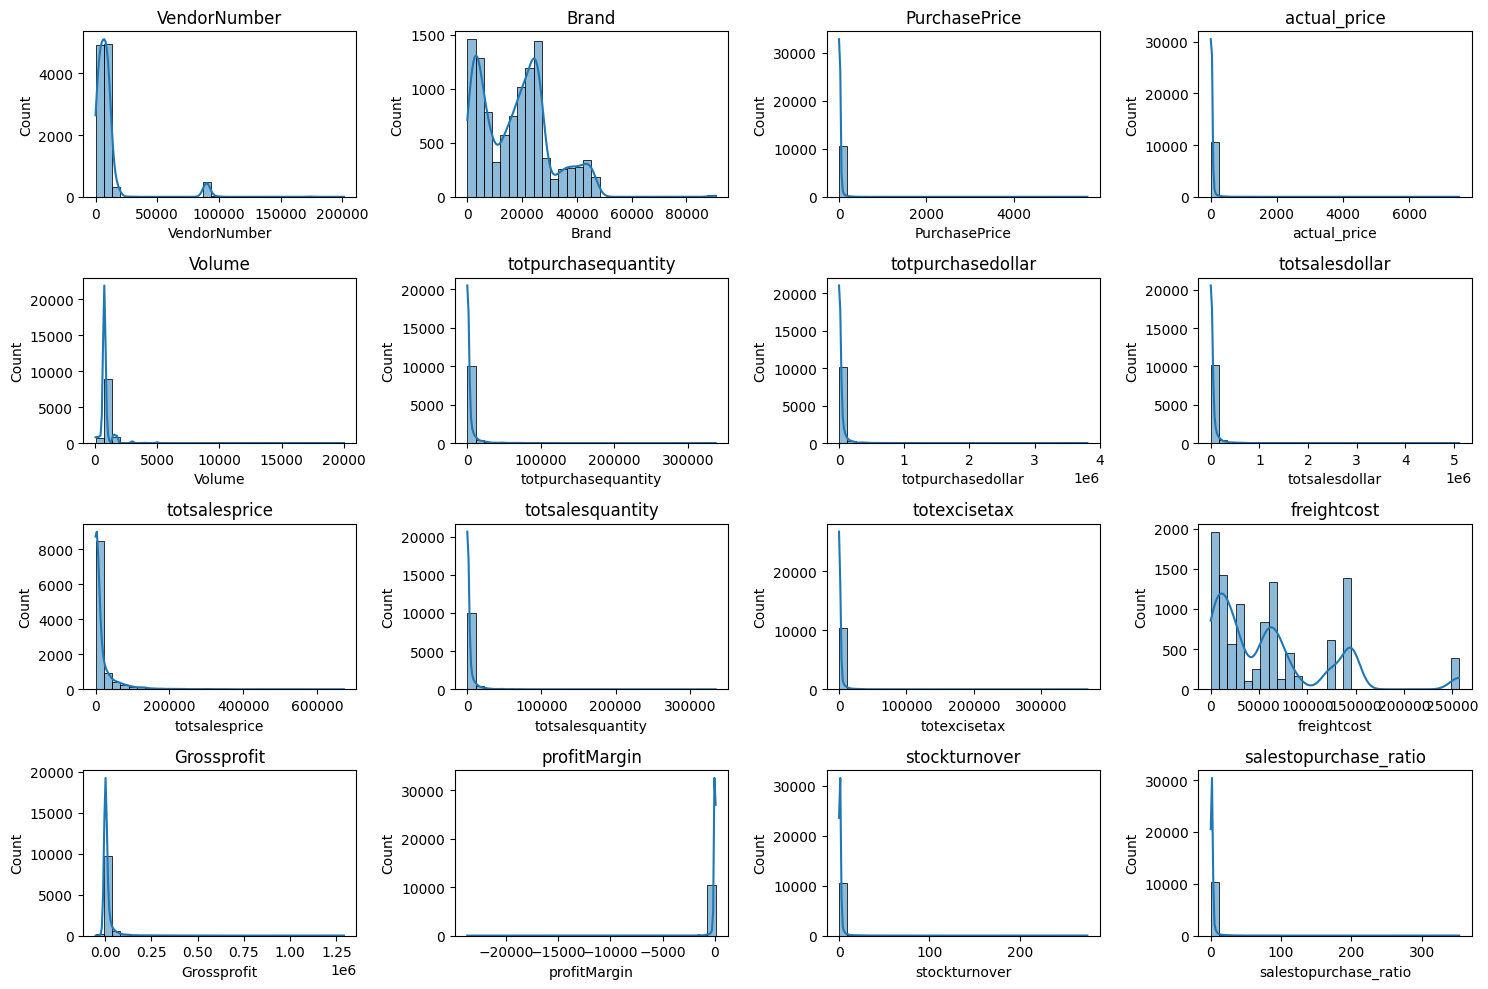

In [4]:
#distribution plots for numerical columns
numerical_cols= df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,10))
for i,col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1) #adjust grid layout as needed
    sns.histplot(df[col],kde=True,bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

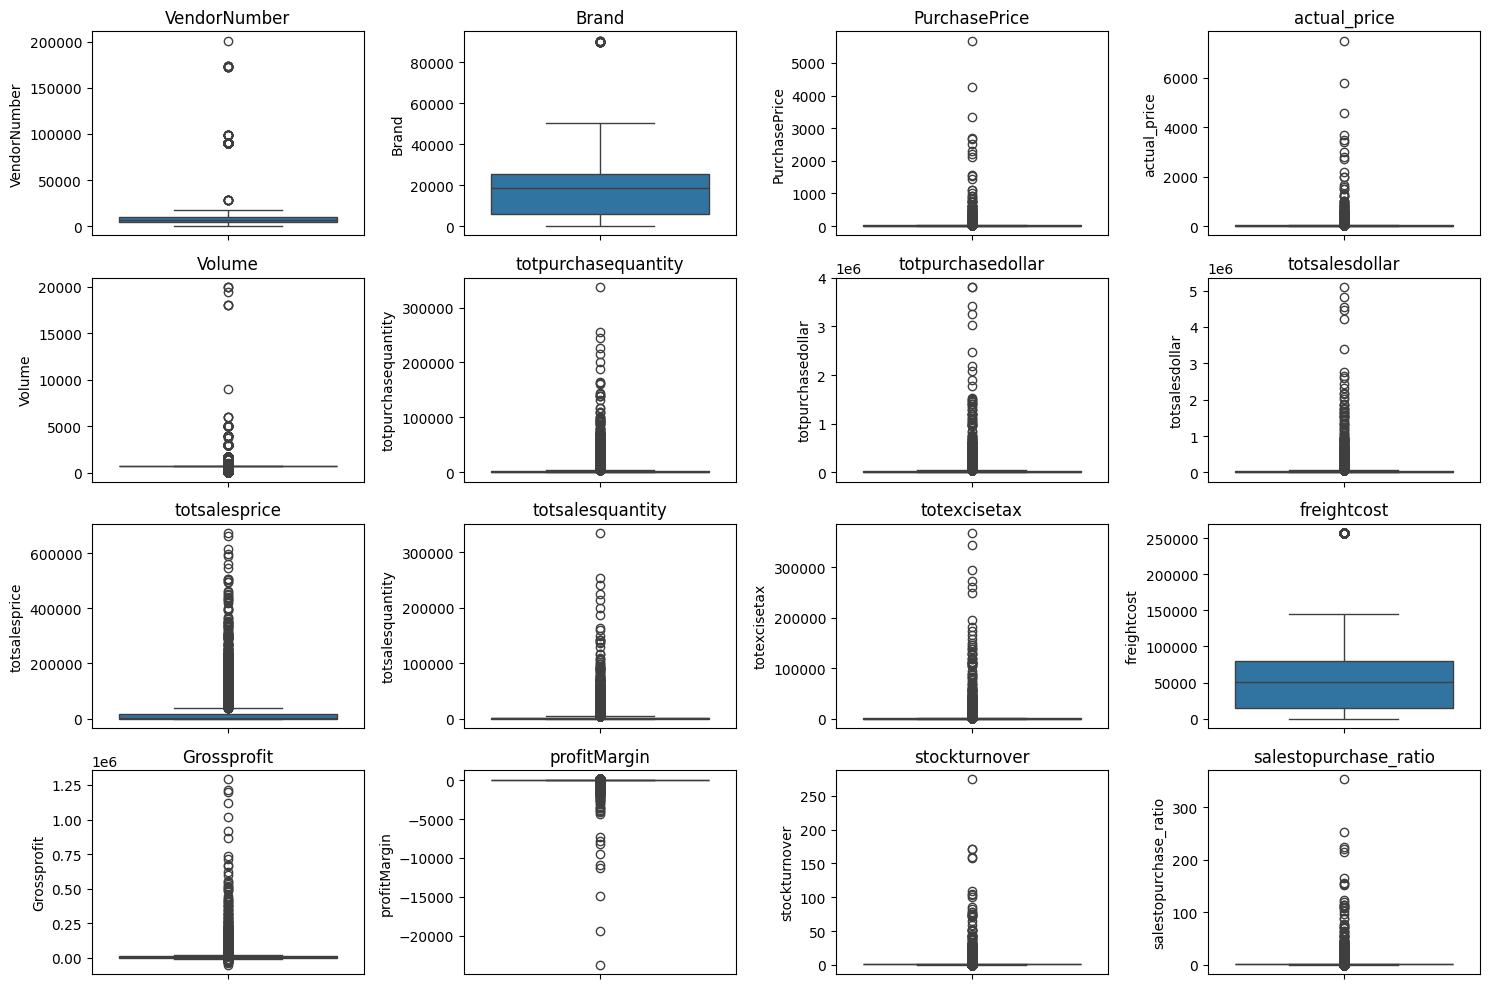

In [5]:
#outlier detection with boxplot
plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [6]:
#lets filter the data by removing inconsistencies
df= pd.read_sql_query("""select *
from vendor_sales_summary
where Grossprofit > 0
and profitMargin > 0
and totsalesquantity > 0""",conn)
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,actual_price,Volume,totpurchasequantity,totpurchasedollar,totsalesdollar,totsalesprice,totsalesquantity,totexcisetax,freightcost,Grossprofit,profitMargin,stockturnover,salestopurchase_ratio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,5101919.51,672819.31,142049.0,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,4819073.49,561512.37,160247.0,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,4538120.60,461140.15,187140.0,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,4475972.88,420050.01,200412.0,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,4223107.62,545778.28,135838.0,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,15.95,10.96,5.0,0.55,27100.41,13.31,83.448276,2.500000,6.041667
8560,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,65.66,1.47,134.0,7.04,50293.62,63.32,96.436186,22.333333,28.059829
8561,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,1.98,0.99,2.0,0.10,14069.87,0.50,25.252525,1.000000,1.337838
8562,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,143.28,77.61,72.0,15.12,257032.07,141.81,98.974037,72.000000,97.469388


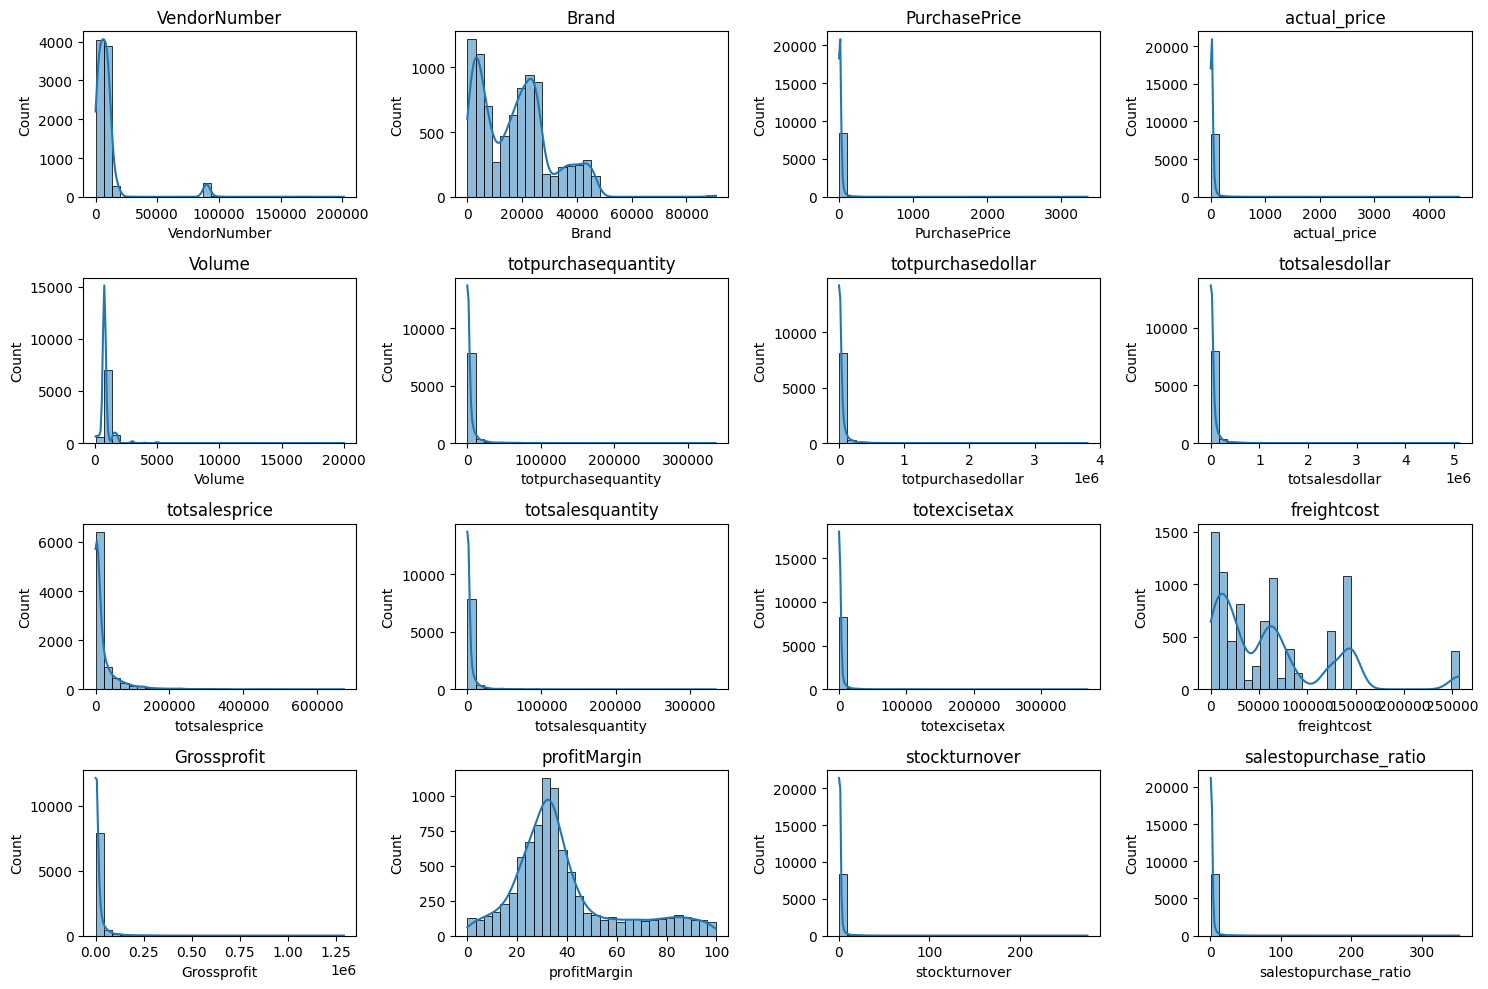

In [7]:
#distribution plots for numerical columns
numerical_cols= df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,10))
for i,col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1) #adjust grid layout as needed
    sns.histplot(df[col],kde=True,bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

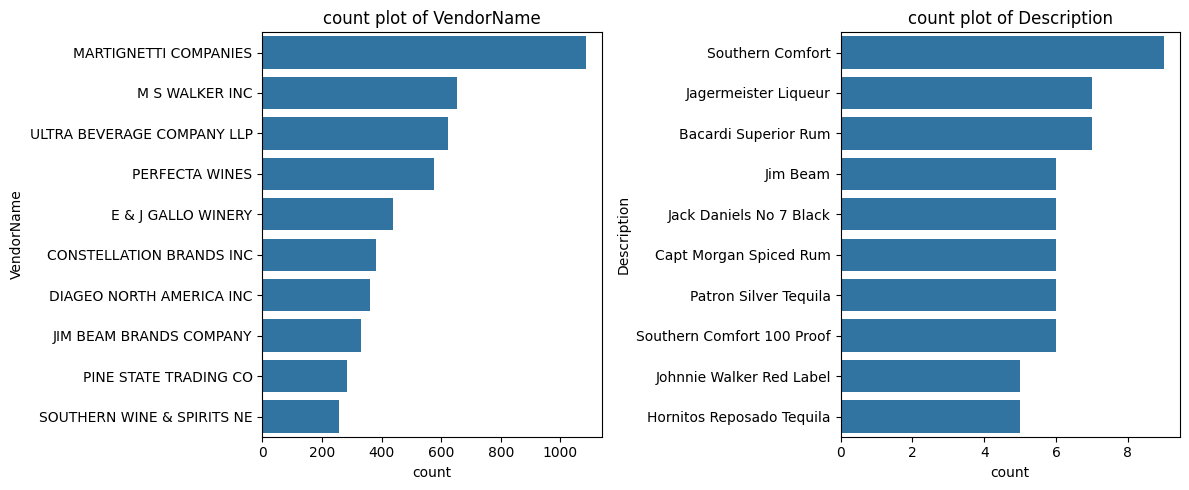

In [8]:
#count plots for categorical columns
categorical_cols=['VendorName','Description']

plt.figure(figsize=(12,5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1,2,i+1)
    sns.countplot(y=df[col], order=df[col].value_counts().index[:10]) #top 10 categories
    plt.title(f'count plot of {col}')
plt.tight_layout()
plt.show()


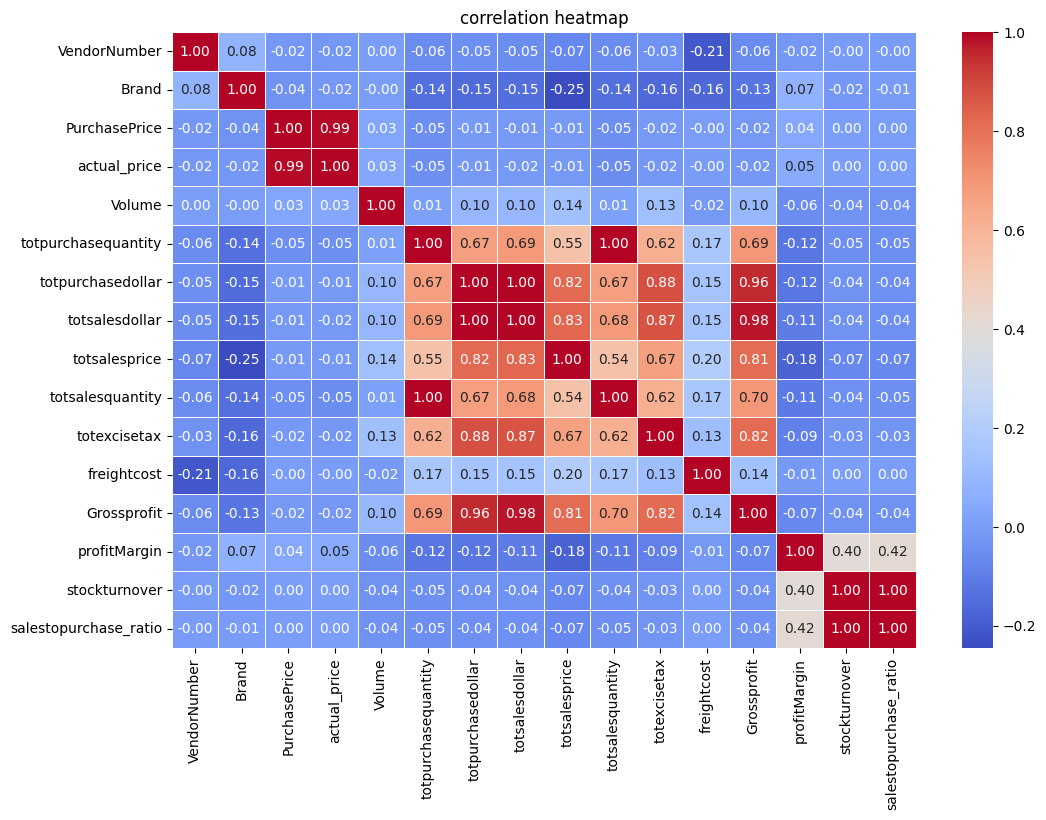

In [9]:
#correlation heatmap
plt.figure(figsize=(12,8))
correlation_matrix= df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True,fmt=".2f",cmap="coolwarm",linewidths=0.5)
plt.title("correlation heatmap")
plt.show()

identify brands that needs promotional and pricing adjustment which exhibit lower sale performance but higher profit margins.

In [11]:
brand_performance=df.groupby('Description').agg({'totsalesdollar':'sum','profitMargin':'mean'}).reset_index()
brand_performance

,Description,totsalesdollar,profitMargin
0,(RI) 1,21519.09,18.060661
1,.nparalleled Svgn Blanc,1094.63,29.978166
2,10 Span Cab Svgn CC,2703.89,20.937612
3,10 Span Chard CC,3325.56,27.806445
4,10 Span Pnt Gris Monterey Cy,2082.22,32.226182
...,...,...,...
7702,Zorvino Vyds Sangiovese,10579.03,29.525675
7703,Zuccardi Q Malbec,1639.18,23.981503
7704,Zum Rsl,10857.34,32.675038
7705,Zwack Liqueur,227.88,16.653502


In [12]:
low_sales_threshold= brand_performance['totsalesdollar'].quantile(0.15)
high_margin_threshold= brand_performance['profitMargin'].quantile(0.85)

In [13]:
low_sales_threshold

np.float64(560.299)

In [16]:
low_sales_brands = brand_performance[brand_performance['totsalesdollar'] <= low_sales_threshold]
low_sales_brands

,Description,totsalesdollar,profitMargin
6,12 Days of Pearls Gift Set,309.69,97.678323
8,13th Colony Sthrn Corn Whsky,359.82,42.446223
18,14 Hands Rsl Wash,531.48,22.781666
35,2 Copas Spain White,119.88,33.333333
36,2 Gingers Irish Whiskey,321.86,40.887342
...,...,...,...
7686,Zhenka Vodka 80 Proof,240.39,87.303964
7692,Zoe Red by D Skouras,299.75,2.718932
7694,Zonin Moscato,383.64,48.952143
7696,Zorah Red,417.81,67.559417


In [17]:
high_margin_threshold

np.float64(64.97017552750113)

In [18]:
high_margin_brands = brand_performance[brand_performance['profitMargin'] >= high_margin_threshold]
high_margin_brands

,Description,totsalesdollar,profitMargin
6,12 Days of Pearls Gift Set,309.69,97.678323
27,1800 Select Silver Tequila,2129.29,89.445778
37,20 Mile 09 Brdx Superior,1949.48,83.769005
45,4 Orange Vodka,483.78,85.902683
52,A Bichot Adelie Mercury,815.76,72.038345
...,...,...,...
7686,Zhenka Vodka 80 Proof,240.39,87.303964
7690,Zinsane Znfdl Lodi,14789.49,98.381553
7691,Zion Dolev Muscato,1329.79,72.275322
7696,Zorah Red,417.81,67.559417


In [20]:
## filter brands with low sales but high profit margins
target_brands = brand_performance[
    (brand_performance['totsalesdollar']<= low_sales_threshold) &
    (brand_performance['profitMargin']>= high_margin_threshold)
]
print('brand with low sales but high profit margins:')
display(target_brands.sort_values('totsalesdollar'))

brand with low sales but high profit margins:


,Description,totsalesdollar,profitMargin
6199,Santa Rita Organic Svgn Bl,9.99,66.466466
2369,Debauchery Pnt Nr,11.58,65.975820
2070,Concannon Glen Ellen Wh Zin,15.95,83.448276
2188,Crown Royal Apple,27.86,89.806174
6237,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.68,76.747312
2271,Dad's Hat Rye Whiskey,538.89,81.851584
57,A Bichot Clos Marechaudes,539.94,67.740860
6245,Sbragia Home Ranch Merlot,549.75,66.444748


In [22]:
brand_performance = brand_performance[brand_performance['totsalesdollar']<10000] # not removing but for better visualization

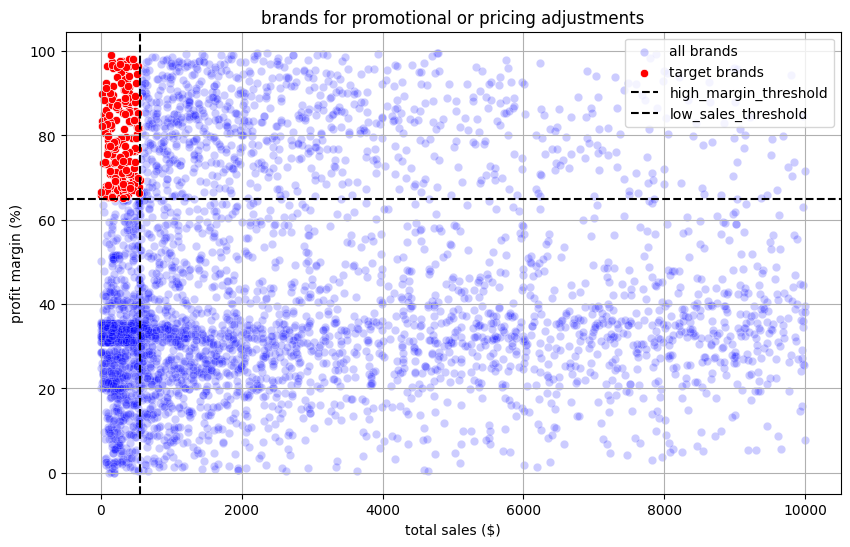

In [23]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=brand_performance, x='totsalesdollar', y='profitMargin',color='blue',label="all brands",alpha=0.2)
sns.scatterplot(data= target_brands, x='totsalesdollar', y='profitMargin', color='red', label='target brands')

plt.axhline(high_margin_threshold, linestyle='--', color= 'black', label='high_margin_threshold')
plt.axvline(low_sales_threshold, linestyle='--', color= 'black', label='low_sales_threshold')

plt.xlabel('total sales ($)')
plt.ylabel('profit margin (%)')
plt.title('brands for promotional or pricing adjustments')
plt.legend()
plt.grid(True)
plt.show()

which vendor and brands demonstrate the highest sale performance?

In [25]:
def format_dollar(value):
    if value >= 1_000_000:
        return f'{value / 1_000_000:.2f}M'
    elif value >= 1_000:
        return f'{value / 1_000:.2f}k'
    else:
        return str(value)        

In [28]:
#top vendors and brand by sale performance
top_vendors = df.groupby('VendorName')['totsalesdollar'].sum().nlargest(10)
top_brands= df.groupby('Description')['totsalesdollar'].sum().nlargest(10)
top_vendors

VendorName
DIAGEO NORTH AMERICA INC      67990099.42
MARTIGNETTI COMPANIES         39330359.36
PERNOD RICARD USA             32063196.19
JIM BEAM BRANDS COMPANY       31423020.46
BACARDI USA INC               24854817.14
CONSTELLATION BRANDS INC      24218745.65
E & J GALLO WINERY            18399899.46
BROWN-FORMAN CORP             18247230.65
ULTRA BEVERAGE COMPANY LLP    16502544.31
M S WALKER INC                14706458.51
Name: totsalesdollar, dtype: float64

In [29]:
top_brands

Description
Jack Daniels No 7 Black    7964746.76
Tito's Handmade Vodka      7399657.58
Grey Goose Vodka           7209608.06
Capt Morgan Spiced Rum     6356320.62
Absolut 80 Proof           6244752.03
Jameson Irish Whiskey      5715759.69
Ketel One Vodka            5070083.56
Baileys Irish Cream        4150122.07
Kahlua                     3604858.66
Tanqueray                  3456697.90
Name: totsalesdollar, dtype: float64

In [30]:
top_brands.apply(lambda x : format_dollar(x))

Description
Jack Daniels No 7 Black    7.96M
Tito's Handmade Vodka      7.40M
Grey Goose Vodka           7.21M
Capt Morgan Spiced Rum     6.36M
Absolut 80 Proof           6.24M
Jameson Irish Whiskey      5.72M
Ketel One Vodka            5.07M
Baileys Irish Cream        4.15M
Kahlua                     3.60M
Tanqueray                  3.46M
Name: totsalesdollar, dtype: object

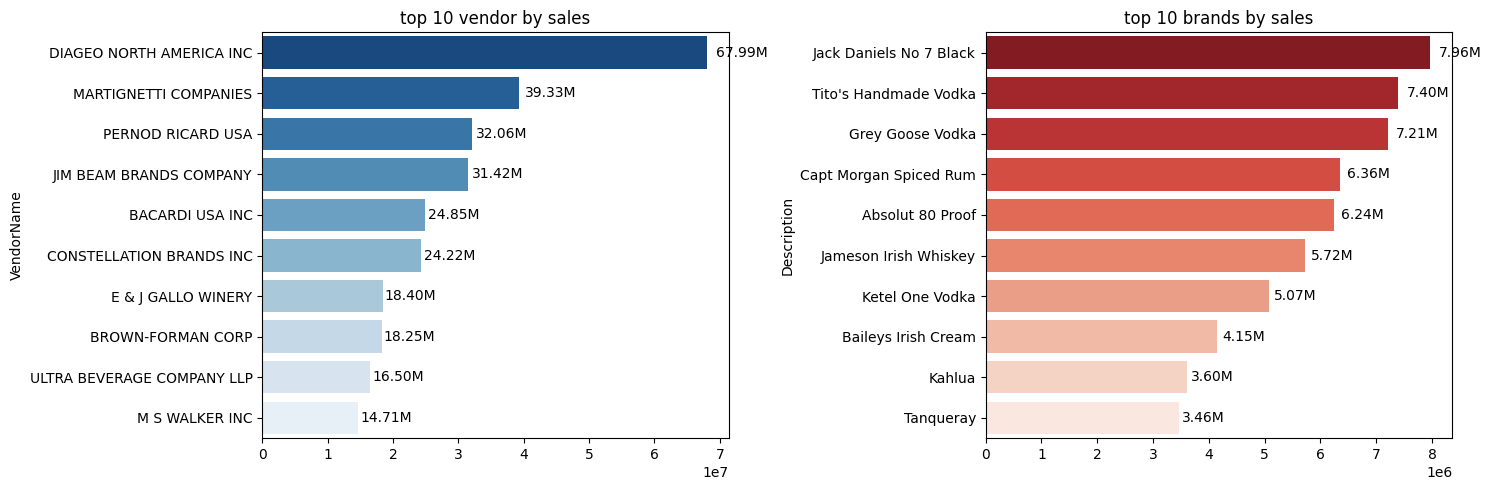

In [31]:
plt.figure(figsize=(15,5))
# plot for top vendor
plt.subplot(1,2,1)
ax1=sns.barplot(y=top_vendors.index, x=top_vendors.values, palette='Blues_r')
plt.title('top 10 vendor by sales')

for bar in ax1.patches:
    ax1.text(bar.get_width()+(bar.get_width() * 0.02),
    bar.get_y()+bar.get_height() / 2,
    format_dollar(bar.get_width()),
    ha='left', va='center', fontsize=10, color='black')

# plot for top brands
plt.subplot(1,2,2)
ax2=sns.barplot(y=top_brands.index.astype(str), x=top_brands.values, palette='Reds_r')
plt.title('top 10 brands by sales')

for bar in ax2.patches:
    ax2.text(bar.get_width()+(bar.get_width() * 0.02),
    bar.get_y()+bar.get_height() / 2,
    format_dollar(bar.get_width()),
    ha='left', va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()


which vendor contibute the most to total purchase dollars?

In [32]:
vendor_performance=df.groupby('VendorName').agg({
    'totpurchasedollar':'sum',
    'Grossprofit':'sum',
    'totsalesdollar':'sum'
}).reset_index()

In [33]:
vendor_performance['purchasecontribution%']= vendor_performance['totpurchasedollar']/vendor_performance['totpurchasedollar'].sum()*100

In [35]:
vendor_performance=round(vendor_performance.sort_values('purchasecontribution%', ascending=False),2)

In [36]:
#display top 10 vendors
top_vendors= vendor_performance.head(10)
top_vendors['totsalesdollar']= top_vendors['totsalesdollar'].apply(format_dollar)
top_vendors['totpurchasedollar']= top_vendors['totpurchasedollar'].apply(format_dollar)
top_vendors['Grossprofit']= top_vendors['Grossprofit'].apply(format_dollar)
top_vendors

,VendorName,totpurchasedollar,Grossprofit,totsalesdollar,purchasecontribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.30
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18


In [37]:
top_vendors['purchasecontribution%'].sum()

np.float64(65.69000000000001)

In [38]:
top_vendors['cumulative_contribution%']= top_vendors['purchasecontribution%'].cumsum()
top_vendors

,VendorName,totpurchasedollar,Grossprofit,totsalesdollar,purchasecontribution%,cumulative_contribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30,16.30
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.30,24.60
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76,32.36
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64,40.00
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67,45.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97,50.64
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31,54.95
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93,58.88
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63,62.51
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18,65.69


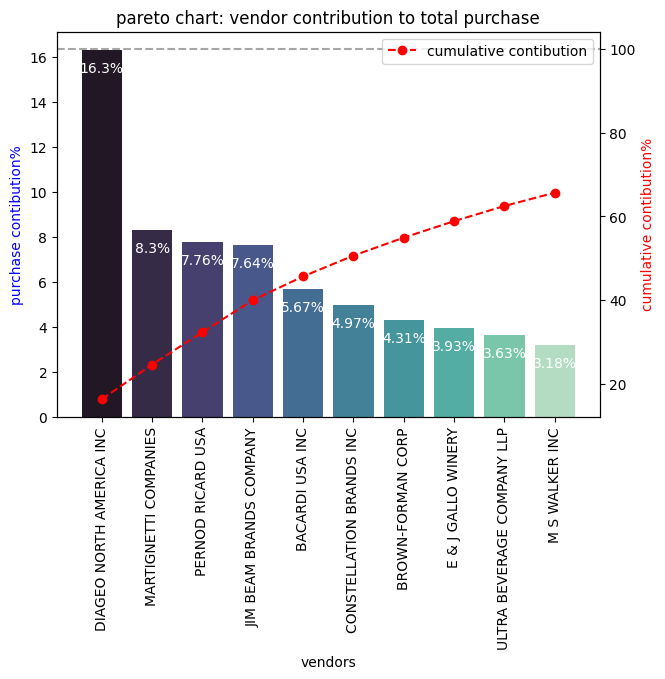

In [39]:
top_vendors['cumulative_contribution%']=top_vendors['purchasecontribution%'].cumsum()
fig, ax1=plt.subplots(figsize=(7,5))
#barplot for purchase contribution%
sns.barplot(x=top_vendors['VendorName'], y=top_vendors['purchasecontribution%'], palette='mako', ax=ax1)

for i, value in enumerate(top_vendors['purchasecontribution%']):
    ax1.text(i,value - 1, str(value)+ '%',ha='center', fontsize=10, color='white')

#line plot for cumulative contribution%
ax2 =ax1.twinx()
ax2.plot(top_vendors['VendorName'], top_vendors['cumulative_contribution%'], color='red', marker='o', linestyle='dashed',label='cumulative contibution')

ax1.set_xticklabels(top_vendors['VendorName'], rotation=90)
ax1.set_ylabel('purchase contibution%',color='blue')
ax2.set_ylabel('cumulative contibution%',color='red')
ax1.set_xlabel('vendors')
ax1.set_title('pareto chart: vendor contribution to total purchase')

ax2.axhline(y=100, color='gray', linestyle='dashed', alpha=0.7)
ax2.legend(loc='upper right')

plt.show()

how much of total procurement is dependent on the top vendor?

In [40]:
print(f'total purchase contribution of top 10 vendor is {round(top_vendors['purchasecontribution%'].sum(),2)}%')

total purchase contribution of top 10 vendor is 65.69%


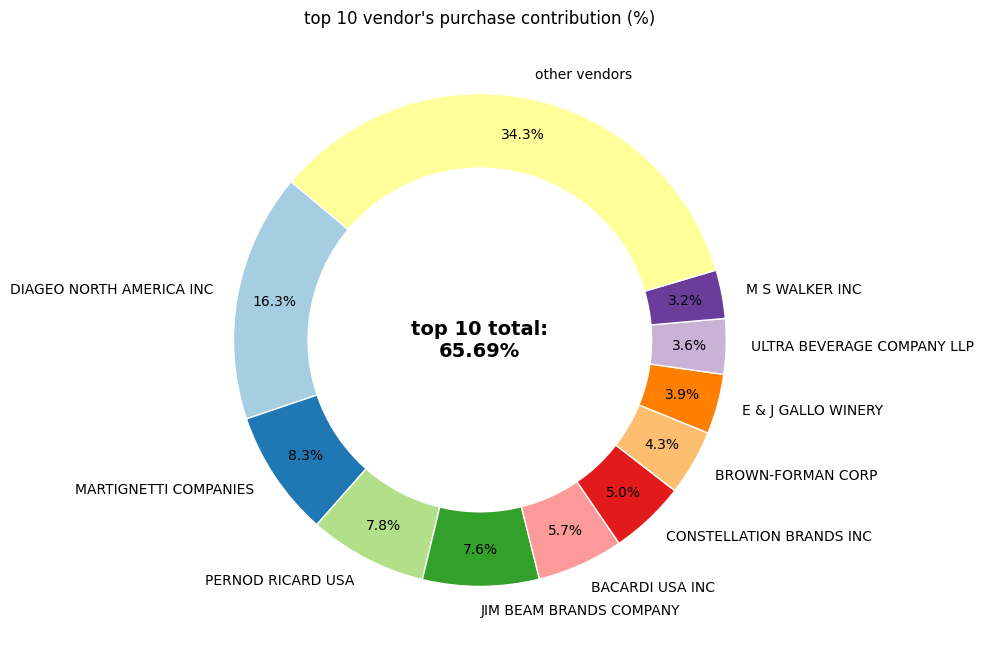

In [41]:
vendor= list(top_vendors['VendorName'].values)
purchase_contribution= list(top_vendors['purchasecontribution%'].values)
total_contribution= sum(purchase_contribution)
remaining_contribution= 100-total_contribution

#Append other vendors category
vendor.append('other vendors')
purchase_contribution.append(remaining_contribution)

#donut chart
fig, ax=plt.subplots(figsize=(8,8))
wedges, texts, autotexts= ax.pie(000000000000000purchase_contribution, labels=vendor, autopct='%1.1f%%',
                               startangle=140, pctdistance=0.85, colors=plt.cm.Paired.colors,
                                wedgeprops={'linewidth': 1,'edgecolor': 'white'})

#Draw white circle in the center to create a donut effect
centre_circle= plt.Circle((0,0),0.70, fc='white')
fig.gca().add_artist(centre_circle)

#add total contribution annotation in the center
plt.text(0,0,f'top 10 total:\n{total_contribution:.2f}%',fontsize=14,fontweight='bold', ha='center', va='center')

plt.title("top 10 vendor's purchase contribution (%)")
plt.show()

does purchasing in bulk reduce the unit price, and what is the optimal purchase volume for cost savings?

In [42]:
df['unitpurchaseprice']=df['totpurchasedollar']/df['totpurchasequantity']

In [43]:
df['ordersize']= pd.qcut(df['totpurchasequantity'],q=3, labels=['small','medium','large'])

In [44]:
df[['ordersize','totpurchasequantity']]

,ordersize,totpurchasequantity
0,large,145080
1,large,164038
2,large,187407
3,large,201682
4,large,138109
...,...,...
8559,small,2
8560,small,6
8561,small,2
8562,small,1


In [45]:
df.groupby('ordersize')[['unitpurchaseprice']].mean()

,unitpurchaseprice
ordersize,
small,39.068186
medium,15.486414
large,10.777625


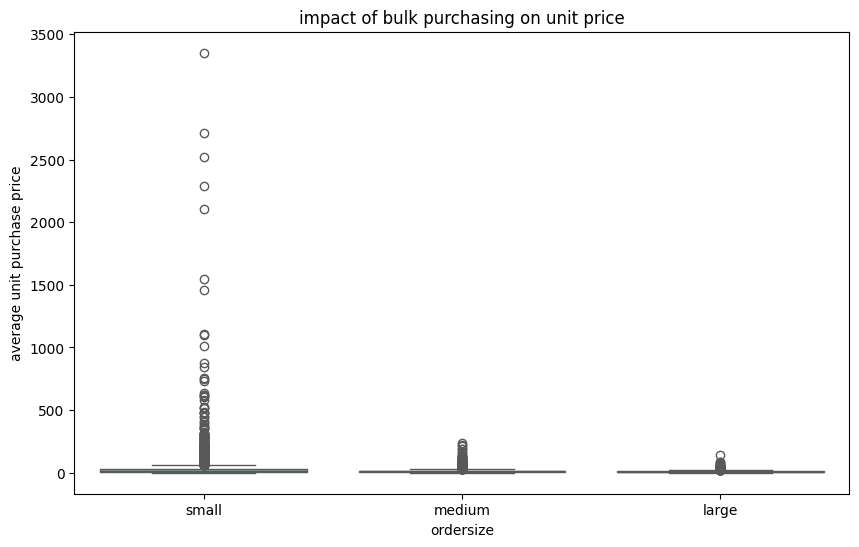

In [46]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='ordersize', y='unitpurchaseprice', palette='Set2')
plt.title('impact of bulk purchasing on unit price')
plt.xlabel('ordersize')
plt.ylabel('average unit purchase price')
plt.show()

which vendor have low inventory turnover, indicating excess stock and slow-moving products?

In [47]:
df[df['stockturnover']<1]

,VendorNumber,VendorName,Brand,Description,PurchasePrice,actual_price,Volume,totpurchasequantity,totpurchasedollar,totsalesdollar,totsalesprice,totsalesquantity,totexcisetax,freightcost,Grossprofit,profitMargin,stockturnover,salestopurchase_ratio,unitpurchaseprice,ordersize
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,5101919.51,672819.31,142049.0,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647,26.27,large
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,4819073.49,561512.37,160247.0,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830,23.19,large
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,4538120.60,461140.15,187140.0,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594,18.24,large
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,4475972.88,420050.01,200412.0,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493,16.17,large
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,4223107.62,545778.28,135838.0,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897,21.89,large
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8191,653,STATE WINE & SPIRITS,24371,Tozai Typhoon Sake,10.45,15.99,720.0,6,62.70,79.95,79.95,5.0,0.55,8014.98,17.25,21.575985,0.833333,1.275120,10.45,small
8201,9552,M S WALKER INC,398,S S Pierce Ninety Nine Gin,5.63,7.49,1000.0,11,61.93,67.41,7.49,9.0,9.45,55551.82,5.48,8.129358,0.818182,1.088487,5.63,small
8202,1392,CONSTELLATION BRANDS INC,16916,R Mondavi Malbec Private Slt,5.15,7.99,750.0,12,61.80,85.90,34.96,10.0,1.12,79528.99,24.10,28.055879,0.833333,1.389968,5.15,small
8242,8352,LUXCO INC,8629,Ezra Brooks Cinnamon Bourbon,11.02,13.99,1750.0,5,55.10,56.97,37.98,3.0,5.51,10261.60,1.87,3.282429,0.600000,1.033938,11.02,small


In [48]:
df[df['stockturnover']<1].groupby('VendorName')[['stockturnover']].mean().sort_values('stockturnover', ascending=True).head(10)

,stockturnover
VendorName,
ALISA CARR BEVERAGES,0.615385
HIGHLAND WINE MERCHANTS LLC,0.708333
PARK STREET IMPORTS LLC,0.751306
Circa Wines,0.755676
Dunn Wine Brokers,0.766022
CENTEUR IMPORTS LLC,0.773953
SMOKY QUARTZ DISTILLERY LLC,0.783835
TAMWORTH DISTILLING,0.797078
THE IMPORTED GRAPE LLC,0.807569


how much capital is locked in unsold inventory per vendor, and which vendor contribute the most to it?

In [49]:
df['unsoldinventoryvalue']= (df['totpurchasequantity']- df['totsalesquantity'])* df['PurchasePrice']
print('total unsold capital:', format_dollar(df['unsoldinventoryvalue'].sum()))

total unsold capital: 2.71M


In [50]:
#aggregate capital  locked per vendor
inventory_value_per_vendor= df.groupby('VendorName')['unsoldinventoryvalue'].sum().reset_index()

#sort vendor with the highest locked capital
inventory_value_per_vendor=inventory_value_per_vendor.sort_values(by='unsoldinventoryvalue', ascending=False)
inventory_value_per_vendor['unsoldinventoryvalue']=inventory_value_per_vendor['unsoldinventoryvalue'].apply(format_dollar)
inventory_value_per_vendor.head(10)

,VendorName,unsoldinventoryvalue
25,DIAGEO NORTH AMERICA INC,722.21k
46,JIM BEAM BRANDS COMPANY,554.67k
68,PERNOD RICARD USA,470.63k
116,WILLIAM GRANT & SONS INC,401.96k
30,E & J GALLO WINERY,228.28k
79,SAZERAC CO INC,198.44k
11,BROWN-FORMAN CORP,177.73k
20,CONSTELLATION BRANDS INC,133.62k
61,MOET HENNESSY USA INC,126.48k
77,REMY COINTREAU USA INC,118.60k


what is the 95% confidence intervals for profit margins of top performing and low performing vendor

In [51]:
top_threshold = df['totsalesdollar'].quantile(0.75)
low_threshold = df['totsalesdollar'].quantile(0.25)

In [52]:
top_vendors= df[df['totsalesdollar']>= top_threshold]['profitMargin'].dropna()
low_vendors= df[df['totsalesdollar']>= low_threshold]['profitMargin'].dropna()

In [53]:
low_vendors

0       25.297693
1       21.062810
2       24.675786
3       27.139908
4       28.412764
          ...    
8478    99.089399
8503    99.544844
8513    99.348356
8515    99.604734
8523    99.716657
Name: profitMargin, Length: 6423, dtype: float64

In [54]:
def confidence_interval(data, confidence=0.95):
    mean_val=np.mean(data)
    std_err= np.std(data,ddof=1)/np.sqrt(len(data)) #standard error
    t_critical= stats.t.ppf((1+confidence)/2, df=len(data)-1)
    margin_of_error = t_critical *std_err
    return mean_val,mean_val- margin_of_error, mean_val + margin_of_error

top vendor 95% CI:(30.74,31.61),Mean:31.18
low vendor 95% CI:(37.29,38.26),Mean:37.77


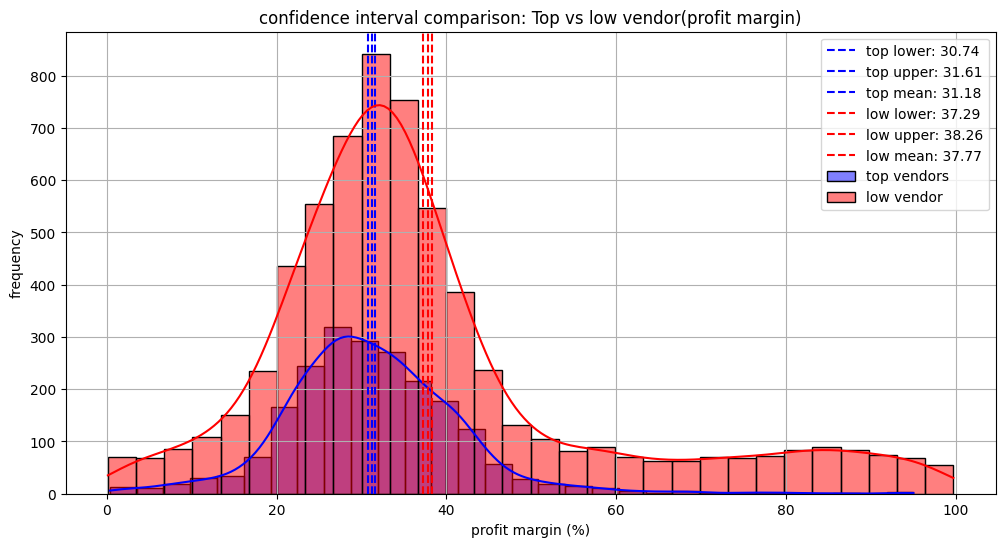

In [55]:
top_mean, top_lower, top_upper= confidence_interval(top_vendors)
low_mean, low_lower, low_upper= confidence_interval(low_vendors)

print(f'top vendor 95% CI:({top_lower:.2f},{top_upper:.2f}),Mean:{top_mean:.2f}')
print(f'low vendor 95% CI:({low_lower:.2f},{low_upper:.2f}),Mean:{low_mean:.2f}')

plt.figure(figsize=(12,6))

#top vendor plot
sns.histplot(top_vendors, kde=True, color='blue', bins=30, alpha=0.5, label='top vendors')
plt.axvline(top_lower, color='blue', linestyle='--', label=f'top lower: {top_lower:.2f}')
plt.axvline(top_upper, color='blue', linestyle='--', label=f'top upper: {top_upper:.2f}')
plt.axvline(top_mean, color='blue', linestyle='--', label=f'top mean: {top_mean:.2f}')

#low vendor plot
sns.histplot(low_vendors,kde=True, color='red', bins=30, alpha=0.5, label='low vendor')
plt.axvline(low_lower, color='red', linestyle='--', label=f'low lower: {low_lower:.2f}')
plt.axvline(low_upper, color='red', linestyle='--', label=f'low upper: {low_upper:.2f}')
plt.axvline(low_mean, color='red', linestyle='--', label=f'low mean: {low_mean:.2f}')

#finalize plot
plt.title('confidence interval comparison: Top vs low vendor(profit margin)')
plt.xlabel('profit margin (%)')
plt.ylabel('frequency')
plt.legend()
plt.grid(True)
plt.show()

is there a significant difference in profit margin between top performing and low performing vendors?

In [57]:
top_threshold = df['totsalesdollar'].quantile(0.75)
low_threshold = df['totsalesdollar'].quantile(0.25)

top_vendors= df[df['totsalesdollar']>= top_threshold]['profitMargin'].dropna()
low_vendors= df[df['totsalesdollar']>= low_threshold]['profitMargin'].dropna()

#perform two samples t-test
t_stats, p_value= ttest_ind(top_vendors,low_vendors, equal_var=False)

#print the result
print(f'T-Statics: {t_stats:.4f}, P-value: {p_value:.4f}')
if p_value < 0.05:
    print("reject Ho: there is significant difference in profit margins between top and low performing vendors")
else:
    print("fail to reject Ho: no significant difference in profit margins")

T-Statics: -19.8217, P-value: 0.0000
reject Ho: there is significant difference in profit margins between top and low performing vendors
